In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
import pickle as pkl
from random import sample 
from Final_Data_Prep import remove_final_dummy, get_train_test, downsample

The notebook is adapted from Training the final model.ipynb, which was used in the original project. 

Below are the changes we have made to the original notebook:

1) Reading the data in from a pickle rather than csv. This pickle was first created by Data_Prep.ipynb Jan 28, 2020 during an effort by Kelsey Markey and Alene Rhea to host this project on GitHub. The pickle was re-run April 2, 2020 to account for shifting remove_final_dummy to to Final_Data_Prep.py [note that this change is immaterial in this context.] It's possible that there are inconsistencies between the data read in from csv in the original notebook, and from the data read in via pickle. This question could be investigated, because the original csv still exists in the project Google Drive.

2) Not dropping date and location columns, as this step was moved to Data_Prep.ipynb in January 2020.

2) Using Final_Data_Prep.py for splitting and downsampling. This script was created in January 2020. All functionality is identical, although some print statements have been removed and dead/unreachable code has been deleted. Final_Data_Prep further updated April 2, 2020 to include function to remove final dummy column from each categorical function. (This functionality had been added in Jan 2020 to Data_Prep.ipynb.)

3) Updating comments.

In [2]:
#read in data
final_df = pd.read_pickle('total_df.pckl.gz', compression = 'gzip')

#remove final dummy column from each categorical column
#remove_final_dummy(final_df)

#put earliest 85% of cases into training df, latest 15% of cases into test df
training_df, test_df = get_train_test(final_df, train_size=0.85, test_size=0.15)

# passing 50 to downsample function means training set will have 50% positive cases
training_df = downsample(training_df, 50)

X_train = training_df.drop('MHI', axis=1)
y_train = training_df['MHI']

X_test = test_df.drop('MHI', axis=1)
y_test = test_df['MHI']

In [3]:
clf = GradientBoostingClassifier(random_state=42, max_depth = 3, 
                                 min_samples_leaf = 10, learning_rate=.01, 
                                 n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
AUC = auc(fpr, tpr)
recall = metrics.recall_score(y_test, y_pred)

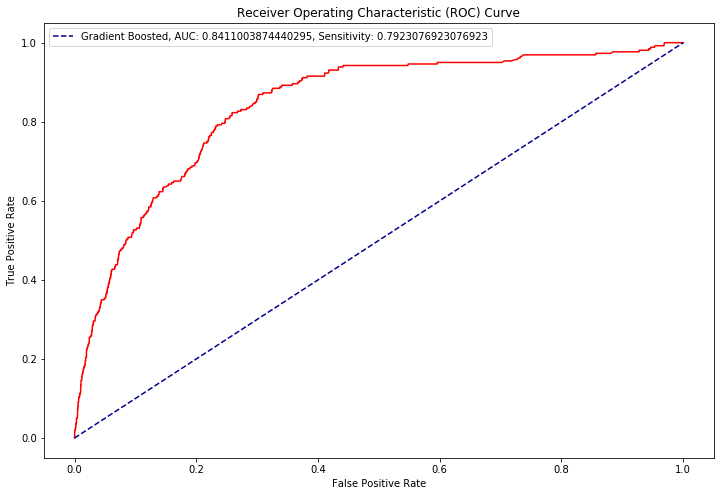

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', 
         label='Gradient Boosted, AUC: {}, Sensitivity: {}'.format(AUC, recall))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [5]:
print('Recall: ', recall)
print('AUC: ', AUC)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Number of positive cases predicted: ', np.sum(y_pred))
print('Actual number of positive cases in test set: ', np.sum(y_test))
print('Predicted prevalence: ', np.sum(y_pred)/len(y_pred))
print('Actual prevalence in test set: ', np.sum(y_test)/len(y_test))

Recall:  0.7923076923076923
AUC:  0.8411003874440295
Accuracy:  0.7651223393215414
Number of positive cases predicted:  10337
Actual number of positive cases in test set:  260
Predicted prevalence:  0.23838295320895694
Actual prevalence in test set:  0.0059958951179577055


Jan 2020 results<br>

Recall:  0.7846153846153846<br>
AUC:  0.8410073633996564<br>
Accuracy:  0.7656296842930609<br>
Number of positive cases predicted:  10311<br>
Actual number of positive cases in test set:  260<br>
Predicted prevalence:  0.2377833636971612<br>
Actual prevalence in test set:  0.0059958951179577055

We still see some differences in these measures as compared to the original measures. In particular, the original recall was 0.761538461538, the original AUC was 0.83586007756, the original accuracy was 0.766321518345, the original number of positive cases predicted was 10269, and the original predicted prevalence was 0.23681479602426031. The measures on the actual test set are identical. This indicates that the January 2020 and April 2020 changes made to the data preparation process have had some effect on the model.